# Fixation probabilities and Invasion diagram

In this notebook we analyse the Stochastic dynamics of (pairwise) social imitation under the small mutation limit (SML)

In [1]:
import os
# Necessary on mac to avoid the process being killed due to duplicated symbol 
# (or link - this is only necessary for compilations with OpenMP)
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import egttools as egt
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

# sns.set_style("whitegrid")
plt.rcParams['svg.fonttype'] = 'none'

In [3]:
egt.numerical.Random.init()
seed = egt.numerical.Random._seed

## Payoff matrix for a Normal Form Game

Here we will analyse a Normal Form game, so we need to first define a payoff matrix

In [4]:
T=4; R=2; P=1; S=0
A = np.array([
    [P, T],
    [S, R]
])

## Select which strategies we want to analyse

We can add all the strategies to a list and pass it to the Game object

In [5]:
strategies = [egt.behaviors.NormalForm.TwoActions.Cooperator(), 
              egt.behaviors.NormalForm.TwoActions.Defector(), 
              egt.behaviors.NormalForm.TwoActions.TFT(),
              egt.behaviors.NormalForm.TwoActions.Pavlov(), 
              egt.behaviors.NormalForm.TwoActions.Random(), 
              egt.behaviors.NormalForm.TwoActions.GRIM()]

In [6]:
strategy_labels = [strategy.type().replace("NFGStrategies::", '') for strategy in strategies]

In [7]:
strategy_labels

['AllC', 'AllD', 'TFT', 'Pavlov', 'Random', 'GRIM']

# Instantiate the Normal Form Game
Now we can instanciate the Game and pass both the strategies and the payoff matrix

In [8]:
game = egt.games.NormalFormGame(100, A, strategies)

## Now we instanciate the StochDynamics class to perform analytical calculations

We pass the expected payoffs calculated by the NormalFormGame class

In [9]:
Z= 100; beta=1
evolver = egt.analytical.StochDynamics(len(strategies), game.expected_payoffs(), Z)

In [10]:
transition_matrix,fixation_probabilities = evolver.transition_and_fixation_matrix(beta)
stationary_distribution = egt.utils.calculate_stationary_distribution(transition_matrix)

## Plot invasion diagram

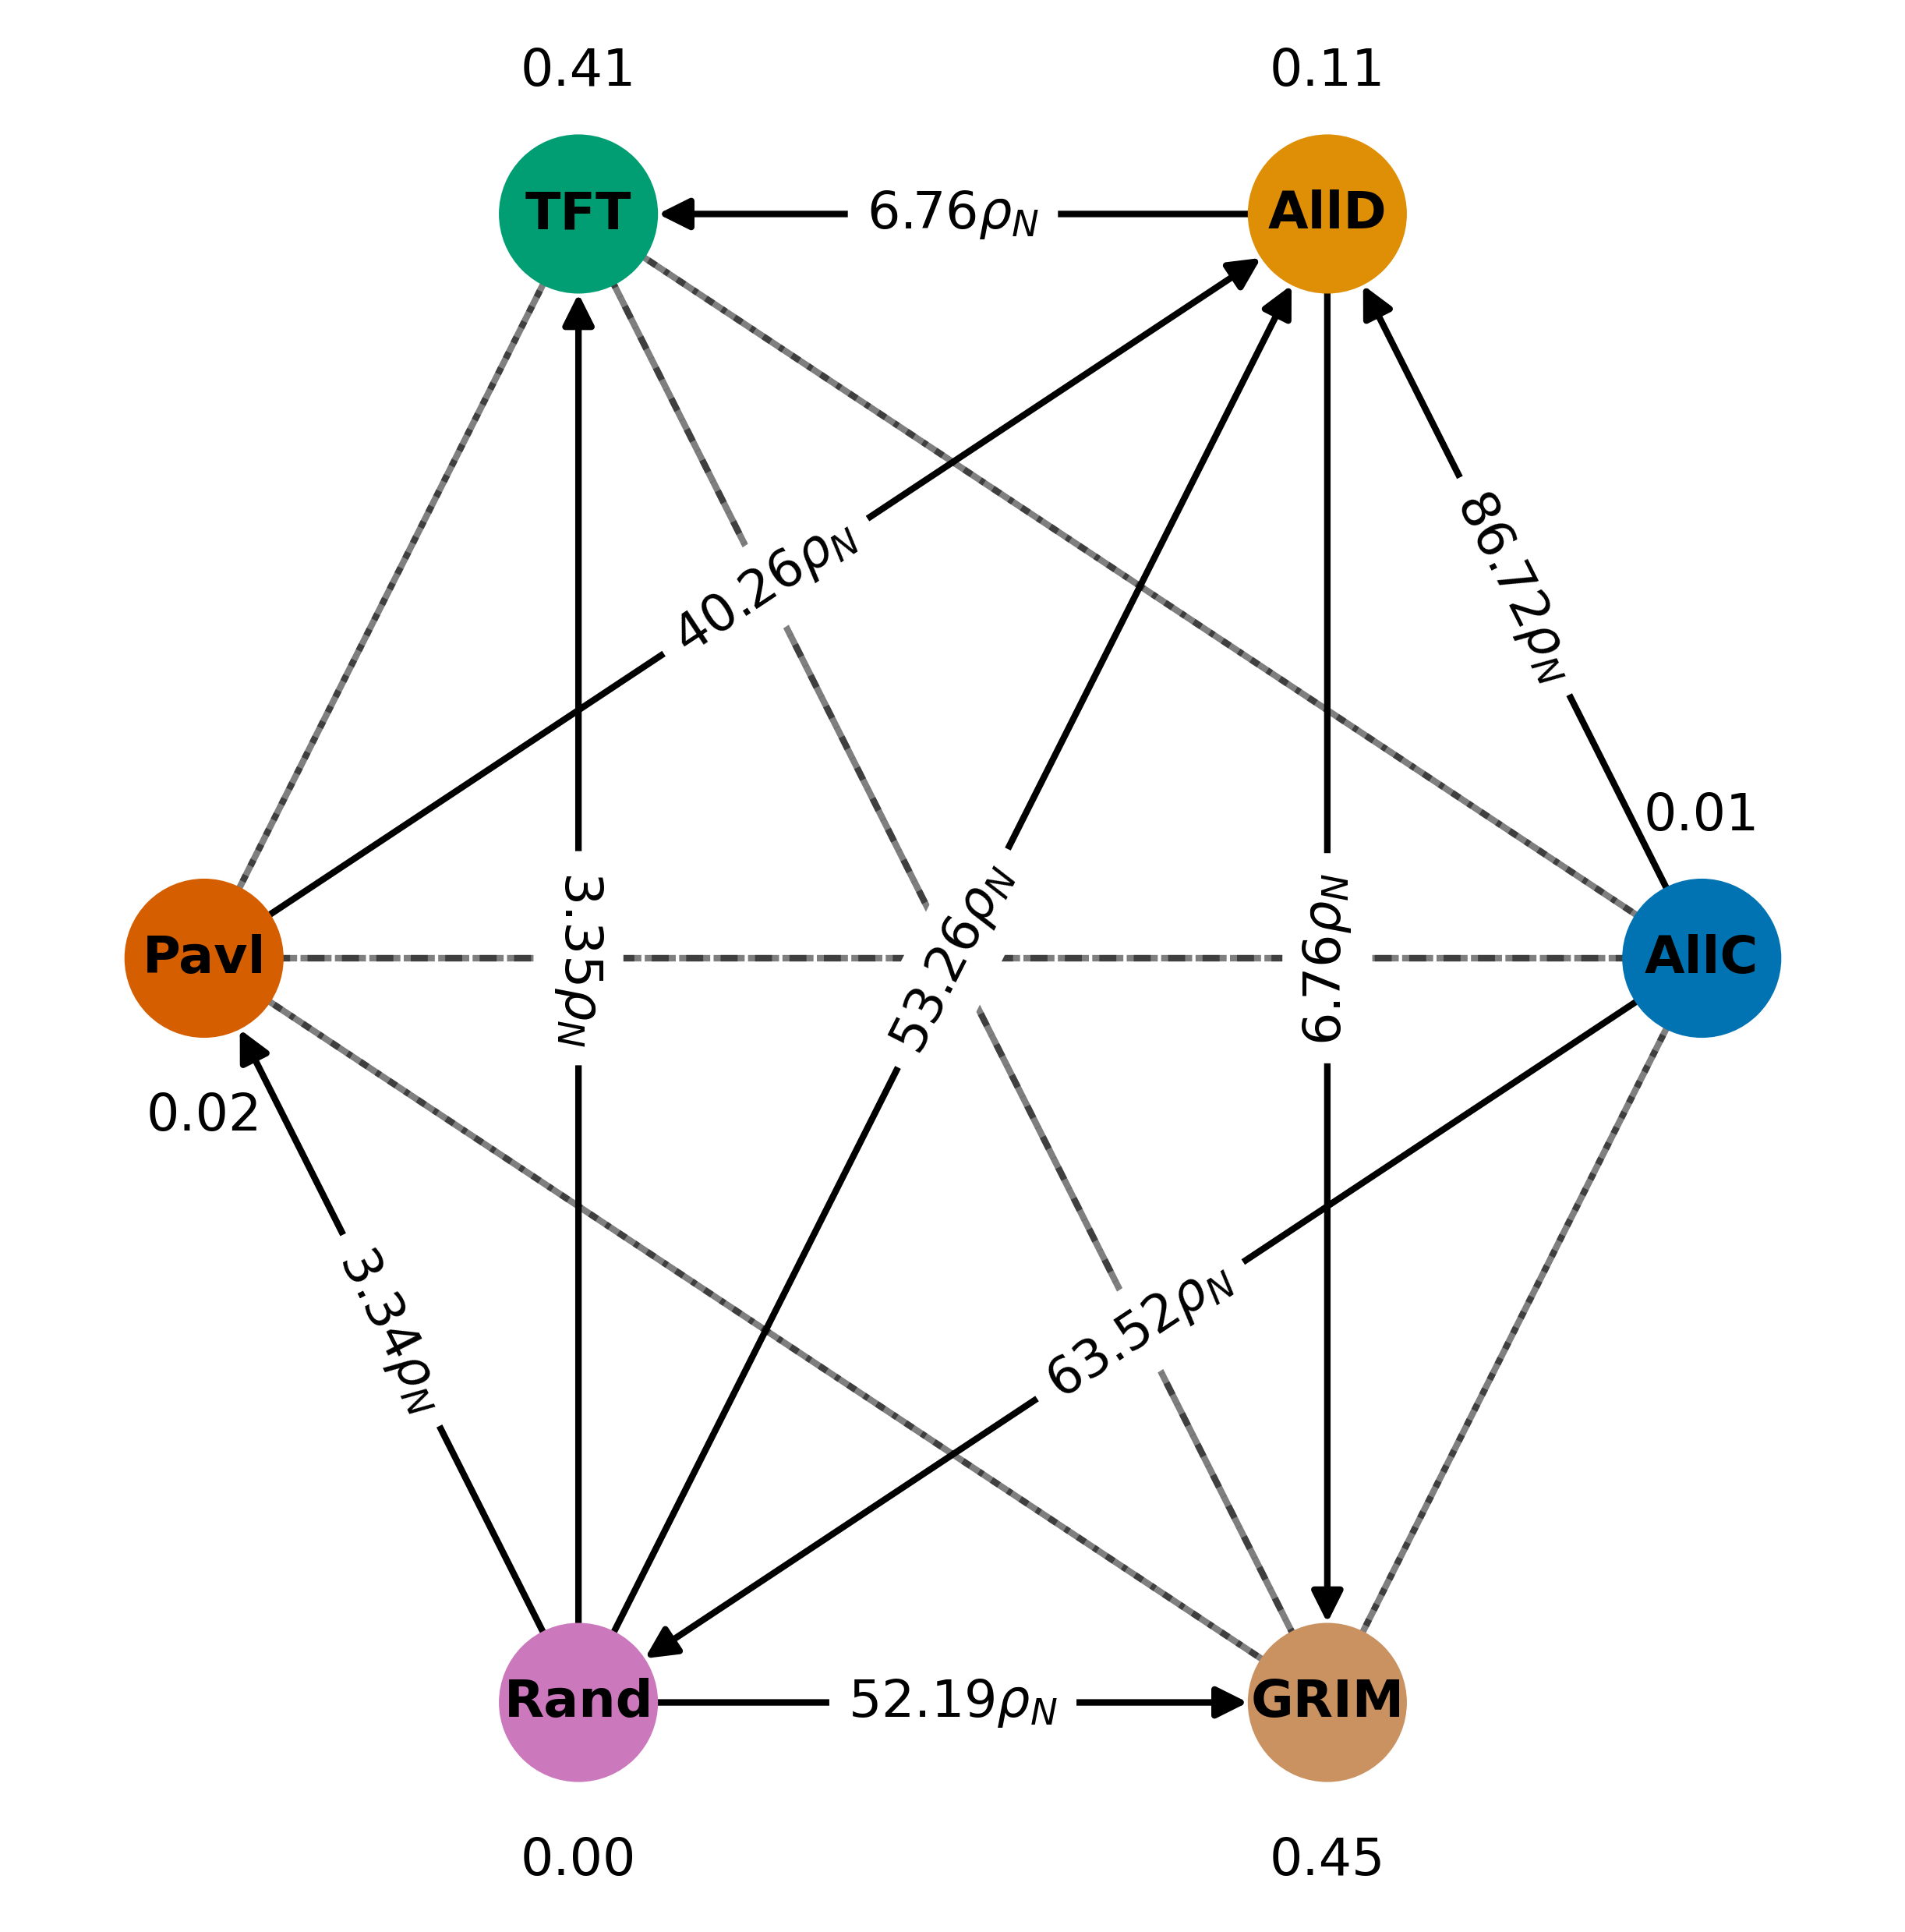

In [11]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=300)
G = egt.plotting.draw_stationary_distribution(strategy_labels,
                                              1/Z, fixation_probabilities, stationary_distribution,
                                              node_size=600, 
                                              font_size_node_labels=8,
                                              font_size_edge_labels=8,
                                              font_size_sd_labels=8,
                                              edge_width=1,
                                              min_strategy_frequency=0.00001, 
                                              ax=ax)
plt.axis('off')
plt.show() # display